# **Image Quantization**                
Image quantization is the process of mapping a large set of continuous or discrete intensity values to a smaller, finite set of intensity levels. It deals with intensity resolution i.e how many grey levels or colors are used to represent pixel values. In simple terms, quantization determines how accurately pixel values are represented.

Converts continuous intensity values into discrete levels.             
Controls the number of grey levels or colors.               
More levels means smoother intensity transitions.                    
Fewer levels means visible banding and distortion.                     
Quantization introduces quantization error.

# Practical Implementation

In [73]:

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# **Floor Quantization**

Maps each pixel down to the lowest intensity level in its bin, simpler to implement but slightly less accurate.

Formula: output = (pixel // step) × step

pixel — the original intensity value (0–255).                  
step — the bin size, calculated as 256 // levels.                   
// — integer division, always rounds down.                         
levels — the number of output intensity levels.

In [74]:
 #Upload Image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving apple.png to apple (4).png


In [75]:
# Load color image
color_img = cv2.imread(filename)

# Convert BGR → RGB for proper display
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)

In [91]:
#Quantization Function

# reduces the number of intensity levels in an image
def quantize_image(image, levels):
    step = 256 // levels
    return (image // step) * step



In [92]:
# Apply Grayscale Quantization
# --------------------------
levels_list = [16, 8, 4]  # Levels to test

quantized_gray = [quantize_image(gray_img, L) for L in levels_list]

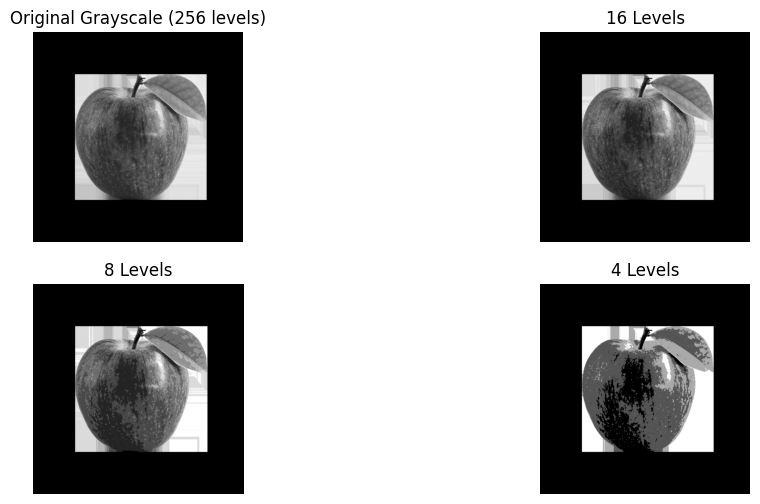

In [93]:
# Display grayscale comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale (256 levels)")
plt.axis('off')

for i, L in enumerate(levels_list):
    plt.subplot(2, 2, i+2)
    plt.imshow(quantized_gray[i], cmap='gray')
    plt.title(f"{L} Levels")
    plt.axis('off')

plt.show()

In [95]:
uploaded = files.upload()  # Upload your new color image
new_filename = list(uploaded.keys())[0]


Saving yellow_green_fruit.jpg to yellow_green_fruit (6).jpg


# **Nearest-Level Quantization**

Maps each pixel to the closest available intensity level by rounding, giving a more accurate representation of the original image.

Formula: q = round((levels - 1) × pixel / 255) → output = q × 255 / (levels - 1)

pixel — the original intensity value (0–255).        
levels — the number of output intensity levels.                                       
q — the quantized level index.                                
255 — the maximum pixel intensity

In [96]:
# Load the new color image
color_img = cv2.imread(new_filename)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB


In [97]:
#Quantization Function

def quantize_coloured_image(image, levels):
    L = 256
    q = np.round((levels - 1) * image / (L - 1))
    return (q * (L - 1) / (levels - 1)).astype(np.uint8)

In [98]:
 #Apply Color Quantization

levels_list = [4, 8, 16]
quantized_color = [quantize_coloured_image(color_img, L) for L in levels_list]

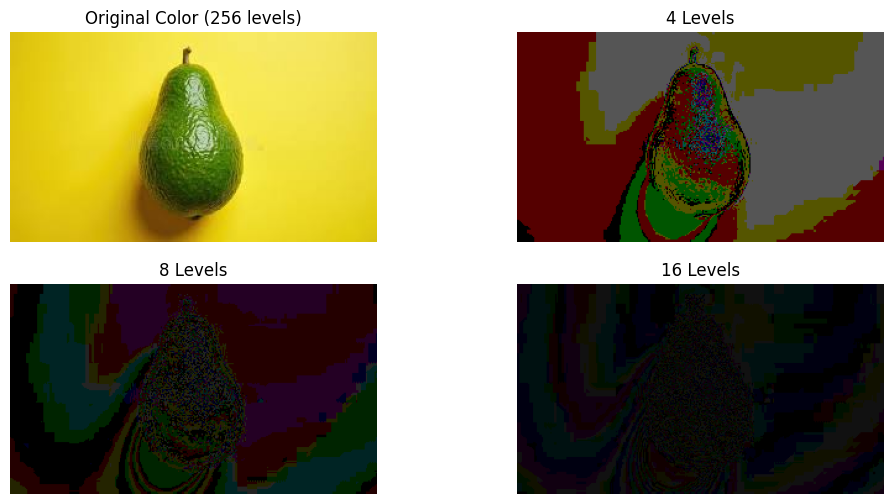

In [99]:
# Display comparison
# --------------------------
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(color_img)
plt.title("Original Color (256 levels)")
plt.axis('off')

for i, L in enumerate(levels_list):
    plt.subplot(2, 2, i+2)
    plt.imshow(quantized_color[i])
    plt.title(f"{L} Levels")
    plt.axis('off')

plt.show()